In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

Let me help you convert this mathematical content about Monte Carlo Methods into Markdown/Jupyter notebook format with proper LaTeX notation. Here's the formatted version:

## Monte Carlo Methods Based on Markov Chains

Despite its formal aspect, Definition 7.1 can be turned into a working principle: the use of a chain $(X^{(t)})$ produced by a Markov chain Monte Carlo algorithm with stationary distribution $f$ is fundamentally identical to the use of an iid sample from $f$ in the sense that the ergodic theorem (Theorem 6.63) guarantees that the sample mean converges:

$$(7.1) \qquad \frac{1}{T} \sum_{t=1}^T h(X^{(t)})$$

Let the quantity $E_f[h(X)]$ be an expectation of interest. If $h$ is a Markov chain Monte Carlo algorithm can thus be employed just as an iid sample. If there is no particular measure of independence but if, rather, the purpose of the simulation study is to examine the properties of the distribution $f$, there is no need for the generation of independent $(X^{(t)}_1,\ldots,X^{(t)}_n)$ whose only use would induce a high cost. Using an MCMC run $(X^{(t)}_1,\ldots,X^{(t)}_n)$ to produce a bias estimate of $(T-1)$ simulations out of $T$. In other words, a single realization (or path) of a Markov chain is enough to ensure a proper approximation of $f$ through estimator like $(7.1)$ for the function $h$ of interest (and sometimes even of the transition distribution). In fact, while this may seem less reliable than the iid case, there often is more information in the trajectory of a Markov chain than in the iid case because of the dependence structure, but same arguments to the convergence assessment of $(7.1)$ are given in Section 7.6 and in Chapter 12.

Would you like me to explain any part of this LaTeX formatting or help you with additional mathematical expressions?

Here's the content formatted in Markdown/Jupyter notebook style with LaTeX:

# 7.3 The Metropolis-Hastings algorithm

Before illustrating the Metropolis-Hastings algorithm in specific situations and demonstrating their straightforward implementation, we first address the (important) issue of theoretical validity. Since the results presented below are valid for all types of Metropolis-Hastings algorithms, we do not include examples in this section, but rather wait for Section 7.4 and 7.5, which present a collection of specific algorithms.

## 7.3.1 Definition

The Metropolis-Hastings algorithm starts with the objective (target) density $f$ to simulate, possibly known up to a constant of proportionality $c$ (that is, $f = cg$ where $g$ is the model to be chosen). The Metropolis-Hastings algorithm can be implemented in practice when $g(x)$ is easy to simulate from and its density is either explicitly available (up to a multiplicative constant independent of $x$) or generates a ratio such that $g(x)$ so that $g(x)/g(x')$ exists. The target density $f$ must be available to some extent: a general requirement is that the ratio:

$$\frac{f(y)}{f(x)}$$

is known up to a constant independent of $x$.

The Metropolis-Hastings algorithm associated with the objective (target) density $f$ and the conditional density $q$ produces a Markov chain $(X^{(t)})$ through the following transition:

**Algorithm A.24 -Metropolis-Hastings-**

Given $x^{(t)}$:
1. Generate $Y_t \sim q(\cdot|x^{(t)})$
2. Take
$$x^{(t+1)} = \begin{cases} 
Y_t & \text{with probability } \rho(x^{(t)}, Y_t) \\
x^{(t)} & \text{with probability } 1-\rho(x^{(t)}, Y_t)
\end{cases}$$

where

$$\rho(x, y) = \min\left\{1, \frac{f(y)}{f(x)} \frac{q(x|y)}{q(y|x)} \right\} \quad (4.24)$$

Let me format this technical mathematical content into Markdown/Jupyter notebook style with LaTeX:

The distribution $q$ is called the instrumental (or proposal) distribution and the probability $\rho(x,y)$ the Metropolis-Hastings acceptance probability.

This algorithm always accepts values $y$ such that the ratio $f(y)/f(x)(q(x|y)/q(y|x))$ is increased, compared with the previous value $f(x^{(t)})/f(x^{(t-1)})$. It follows in the symmetric case that the acceptance is driven by the objective ratio $f(y)/f(x^{(t)})$. An important feature of the algorithm (4.24) is that it may reject some proposed values, hence the name Metropolis-Hastings rejection transition method (see Section 5.4). Like the Accept-Reject method, the Metropolis-Hastings algorithm depends only on the ratios:

$$\frac{f(y)}{f(x^{(t)})} \quad \text{and} \quad \frac{q(x^{(t)}|y)}{q(y|x^{(t)})}$$

and is therefore independent of normalizing constants, meaning again that $q(x|z)$ is known up to a constant that is independent of $z$.

Obviously, the probability $\rho(x^{(t)}, y)$ is defined only when both $q(y|x^{(t)}) > 0$ and $q(x^{(t)}|y) > 0$. However, if the chain starts with a value $x^{(t)}$ such that $f(x^{(t)}) = 0$, if it follows that $f(x^{(t')}) = 0$ for all later time values of $t'$ since $f(y) = 0$ should prevent acceptance of $y$. This means that the support of the chain should be restricted to the convention that the ratio $\rho(x,y)$ is equal to 0 when both $f(x)$ and $f(y)$ are null, in order to avoid theoretical difficulties.

Further theoretical discussion of (4.24) and its support will be developed in Section 7.3.4. It is possible to also use algorithm (4.24) as an alternative to a Accept-Reject algorithm for a given pair $(f,g)$. These approaches are compared in Section 7.4. However, a sample produced by (4.24) differs from an iid sample. For one thing, with a sample now involves convergence to the target distribution $f$ (in the sense of Chapter 6). For another, when $f(x^{(t)}) = f$ (an impossible occurrence in absolutely continuous iid settings). Thus, in calculations, a mean such as (7.1), the $Y$'s generated by the algorithm (4.24) can be associated with weights of the form $m_i/T$ $(m = 0,1,\ldots)$, where $m_i$ counts the number of times the subsequent values have been rejected. (This weighting scheme amounts to repeating these values, which will be discussed in Section 7.6 and Chapter 14.)

While (4.24) is a general algorithm, defined for all $f$ and $q$, it is nonetheless necessary to impose minimal regularity constraints on both $f$ and the conditional distribution $q$ for $f$ to be the limiting distribution of the chain. In particular, in addition to requiring that both distributions have supports connected on uncorrected support $\mathcal{C}$ can invalidate the Metropolis Hastings algorithm. For such supports, it is necessary to proceed on one connected component at a time. (The same difficulty with the different connected components of $\mathcal{C}$ extends to the target of (4.24). If the support of $f$ is transmitted by the algorithm then there exists an $\mathcal{A} \subset \mathcal{E}$ such that:

$$\int_\mathcal{A} f(x)dx > 0 \quad \text{and} \quad \int_\mathcal{A} q(y|x)dy = 0, \quad \forall x \in \mathcal{E}$$

If we omit to this independence from $x$, it is because forgetting a term in $q(x)$ (that depends on $x$) does jeopardize the validity of the whole algorithm.Let me format this technical mathematical content into Markdown/Jupyter notebook style with LaTeX:

The distribution $q$ is called the instrumental (or proposal) distribution and the probability $\rho(x,y)$ the Metropolis-Hastings acceptance probability.

This algorithm always accepts values $y$ such that the ratio $f(y)/f(x)(q(x|y)/q(y|x))$ is increased, compared with the previous value $f(x^{(t)})/f(x^{(t-1)})$. It follows in the symmetric case that the acceptance is driven by the objective ratio $f(y)/f(x^{(t)})$. An important feature of the algorithm (4.24) is that it may reject some proposed values, hence the name Metropolis-Hastings rejection transition method (see Section 5.4). Like the Accept-Reject method, the Metropolis-Hastings algorithm depends only on the ratios:

$$\frac{f(y)}{f(x^{(t)})} \quad \text{and} \quad \frac{q(x^{(t)}|y)}{q(y|x^{(t)})}$$

and is therefore independent of normalizing constants, meaning again that $q(x|z)$ is known up to a constant that is independent of $z$.

Obviously, the probability $\rho(x^{(t)}, y)$ is defined only when both $q(y|x^{(t)}) > 0$ and $q(x^{(t)}|y) > 0$. However, if the chain starts with a value $x^{(t)}$ such that $f(x^{(t)}) = 0$, if it follows that $f(x^{(t')}) = 0$ for all later time values of $t'$ since $f(y) = 0$ should prevent acceptance of $y$. This means that the support of the chain should be restricted to the convention that the ratio $\rho(x,y)$ is equal to 0 when both $f(x)$ and $f(y)$ are null, in order to avoid theoretical difficulties.

Further theoretical discussion of (4.24) and its support will be developed in Section 7.3.4. It is possible to also use algorithm (4.24) as an alternative to a Accept-Reject algorithm for a given pair $(f,g)$. These approaches are compared in Section 7.4. However, a sample produced by (4.24) differs from an iid sample. For one thing, with a sample now involves convergence to the target distribution $f$ (in the sense of Chapter 6). For another, when $f(x^{(t)}) = f$ (an impossible occurrence in absolutely continuous iid settings). Thus, in calculations, a mean such as (7.1), the $Y$'s generated by the algorithm (4.24) can be associated with weights of the form $m_i/T$ $(m = 0,1,\ldots)$, where $m_i$ counts the number of times the subsequent values have been rejected. (This weighting scheme amounts to repeating these values, which will be discussed in Section 7.6 and Chapter 14.)

While (4.24) is a general algorithm, defined for all $f$ and $q$, it is nonetheless necessary to impose minimal regularity constraints on both $f$ and the conditional distribution $q$ for $f$ to be the limiting distribution of the chain. In particular, in addition to requiring that both distributions have supports connected on uncorrected support $\mathcal{C}$ can invalidate the Metropolis Hastings algorithm. For such supports, it is necessary to proceed on one connected component at a time. (The same difficulty with the different connected components of $\mathcal{C}$ extends to the target of (4.24). If the support of $f$ is transmitted by the algorithm then there exists an $\mathcal{A} \subset \mathcal{E}$ such that:

$$\int_\mathcal{A} f(x)dx > 0 \quad \text{and} \quad \int_\mathcal{A} q(y|x)dy = 0, \quad \forall x \in \mathcal{E}$$



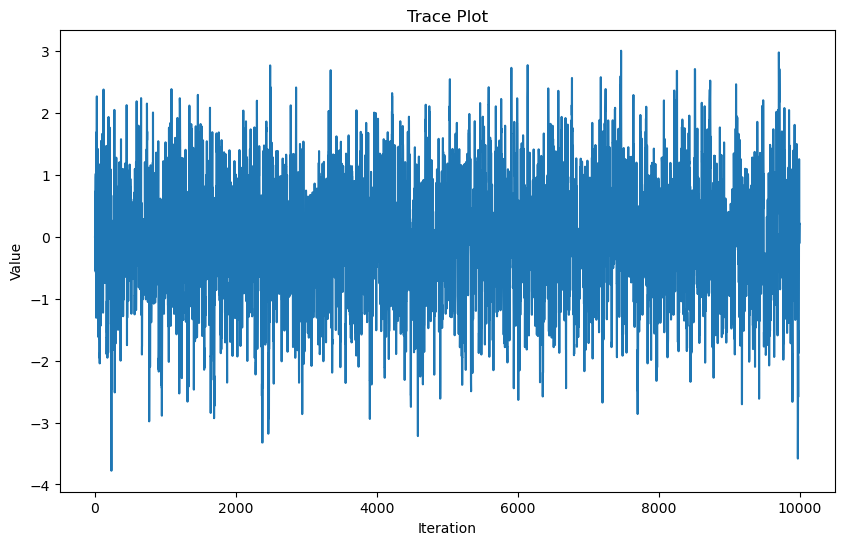

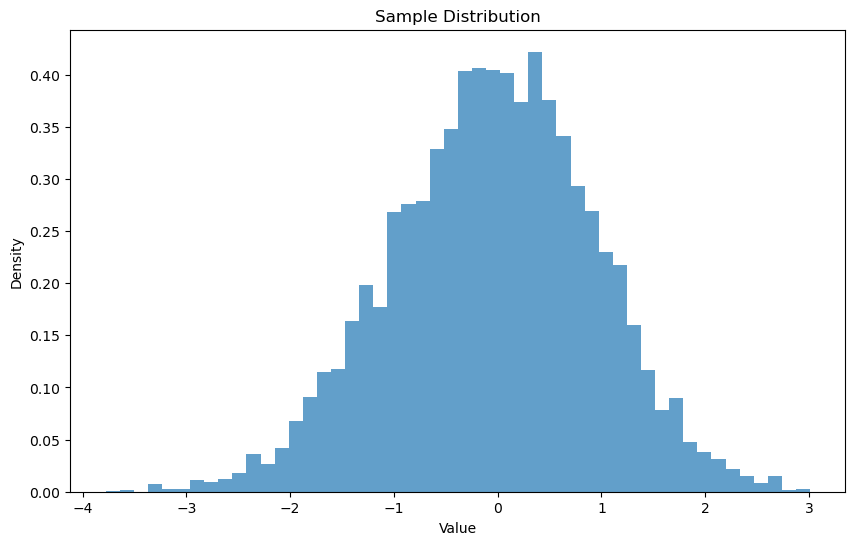

Acceptance rate: 0.71


In [2]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from scipy import stats

class MetropolisHastings:
    def __init__(
        self,
        target_density: Callable,
        proposal_density: Callable,
        proposal_sampler: Callable,
        initial_state: float
    ):
        """
        Initialize Metropolis-Hastings algorithm.
        
        Parameters:
        -----------
        target_density : callable
            The target distribution we want to sample from (up to a constant)
        proposal_density : callable
            The proposal distribution density q(x|y)
        proposal_sampler : callable
            Function to sample from proposal distribution
        initial_state : float
            Starting point of the chain
        """
        self.target_density = target_density
        self.proposal_density = proposal_density
        self.proposal_sampler = proposal_sampler
        self.current_state = initial_state
        self.samples = [initial_state]
        self.acceptances = 0
        self.iterations = 0
    
    def acceptance_probability(self, proposed_state: float) -> float:
        """Calculate the acceptance probability ρ(x,y)."""
        if self.target_density(self.current_state) == 0:
            return 0.0
            
        # Calculate ratio of target densities
        target_ratio = self.target_density(proposed_state) / self.target_density(self.current_state)
        
        # Calculate ratio of proposal densities
        proposal_ratio = (self.proposal_density(self.current_state, proposed_state) / 
                        self.proposal_density(proposed_state, self.current_state))
        
        return min(1.0, target_ratio * proposal_ratio)
    
    def step(self):
        """Perform one step of the Metropolis-Hastings algorithm."""
        # Generate proposal
        proposed_state = self.proposal_sampler(self.current_state)
        
        # Calculate acceptance probability
        acceptance_prob = self.acceptance_probability(proposed_state)
        
        # Accept or reject the proposal
        if np.random.random() < acceptance_prob:
            self.current_state = proposed_state
            self.acceptances += 1
        
        self.samples.append(self.current_state)
        self.iterations += 1
    
    def run(self, n_iterations: int) -> np.ndarray:
        """
        Run the Metropolis-Hastings algorithm for n iterations.
        
        Parameters:
        -----------
        n_iterations : int
            Number of iterations to run
            
        Returns:
        --------
        np.ndarray
            Array of samples
        """
        for _ in range(n_iterations):
            self.step()
        
        return np.array(self.samples)
    
    def acceptance_rate(self) -> float:
        """Calculate the acceptance rate of the chain."""
        return self.acceptances / max(1, self.iterations)
    
    def plot_trace(self):
        """Plot the trace of the Markov chain."""
        plt.figure(figsize=(10, 6))
        plt.plot(self.samples)
        plt.title('Trace Plot')
        plt.xlabel('Iteration')
        plt.ylabel('Value')
        plt.show()
    
    def plot_histogram(self, bins=50):
        """Plot histogram of samples."""
        plt.figure(figsize=(10, 6))
        plt.hist(self.samples, bins=bins, density=True, alpha=0.7)
        plt.title('Sample Distribution')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.show()

# Example usage with a simple normal distribution target
def example_normal_target():
    # Target distribution: Standard normal distribution
    target = lambda x: np.exp(-0.5 * x**2)
    
    # Proposal distribution: Normal distribution centered at current state
    sigma_proposal = 1.0
    proposal_density = lambda x, y: stats.norm.pdf(y, loc=x, scale=sigma_proposal)
    proposal_sampler = lambda x: np.random.normal(x, sigma_proposal)
    
    # Initialize sampler
    mh = MetropolisHastings(
        target_density=target,
        proposal_density=proposal_density,
        proposal_sampler=proposal_sampler,
        initial_state=0.0
    )
    
    # Run sampler
    samples = mh.run(10000)
    
    # Plot results
    mh.plot_trace()
    mh.plot_histogram()
    print(f"Acceptance rate: {mh.acceptance_rate():.2f}")
    
    return mh

if __name__ == "__main__":
    example_normal_target()

In [4]:
import random
import math

def metropolis_hastings(target_density, proposal_sampler, n_iterations, initial_state):
    """
    Basic Metropolis-Hastings algorithm implementation.
    
    Args:
        target_density: Function representing target distribution (up to constant)
        proposal_sampler: Function that returns a proposed state given current state
        n_iterations: Number of iterations to run
        initial_state: Starting point of the chain
    
    Returns:
        List of samples from the target distribution
    """
    current_state = initial_state
    samples = [initial_state]
    accepted = 0
    
    for _ in range(n_iterations):
        # Generate proposal
        proposed_state = proposal_sampler(current_state)
        
        # Calculate acceptance ratio (target density ratio)
        # Note: proposal ratio is 1 in this simple case (symmetric proposal)
        if target_density(current_state) == 0:
            acceptance_ratio = 0
        else:
            acceptance_ratio = target_density(proposed_state) / target_density(current_state)
        
        # Accept or reject
        if random.random() < acceptance_ratio:
            current_state = proposed_state
            accepted += 1
            
        samples.append(current_state)
    
    acceptance_rate = accepted / n_iterations
    return samples, acceptance_rate

# Example usage: sampling from a standard normal distribution
def example_normal():
    # Target density: proportional to standard normal distribution
    def target(x):
        return math.exp(-0.5 * x * x)
    
    # Symmetric random walk proposal (normal distribution)
    def proposal(x, step_size=1.0):
        return x + (random.random() * 2 - 1) * step_size
    
    # Run sampler
    initial_x = 0.0
    n_iterations = 10000
    samples, acceptance_rate = metropolis_hastings(
        target_density=target,
        proposal_sampler=lambda x: proposal(x),
        n_iterations=n_iterations,
        initial_state=initial_x
    )
    
    print(f"Acceptance rate: {acceptance_rate:.2f}")
    return samples

# Simple statistics functions
def mean(samples):
    return sum(samples) / len(samples)

def variance(samples):
    m = mean(samples)
    return sum((x - m) ** 2 for x in samples) / (len(samples) - 1)

if __name__ == "__main__":
    samples = example_normal()
    # Calculate basic statistics (after burn-in)
    burn_in = 1000
    final_samples = samples[burn_in:]
    print(f"Sample mean: {mean(final_samples):.3f}")
    print(f"Sample variance: {variance(final_samples):.3f}")

Acceptance rate: 0.81
Sample mean: 0.040
Sample variance: 0.986


In [ ]:
import random
import math

def metropolis_hastings(target_density, proposal_sampler, n_iterations, initial_state):
    """
    Basic Metropolis-Hastings algorithm implementation.
    
    Args:
        target_density: Function representing target distribution (up to constant)
        proposal_sampler: Function that returns a proposed state given current state
        n_iterations: Number of iterations to run
        initial_state: Starting point of the chain
    
    Returns:
        List of samples from the target distribution
    """
    current_state = initial_state
    samples = [initial_state]
    accepted = 0
    
    for _ in range(n_iterations):
        # Generate proposal
        proposed_state = proposal_sampler(current_state)
        
        # Calculate acceptance ratio (target density ratio)
        # Note: proposal ratio is 1 in this simple case (symmetric proposal)
        if target_density(current_state) == 0:
            acceptance_ratio = 0
        else:
            acceptance_ratio = target_density(proposed_state) / target_density(current_state)
        
        # Accept or reject
        if random.random() < acceptance_ratio:
            current_state = proposed_state
            accepted += 1
            
        samples.append(current_state)
    
    acceptance_rate = accepted / n_iterations
    return samples, acceptance_rate

# Example usage: sampling from a standard normal distribution
def example_normal():
    # Target density: proportional to standard normal distribution
    def target(x):
        return math.exp(-0.5 * x * x)
    
    # Symmetric random walk proposal (normal distribution)
    def proposal(x, step_size=1.0):
        return x + (random.random() * 2 - 1) * step_size
    
    # Run sampler
    initial_x = 0.0
    n_iterations = 10000
    samples, acceptance_rate = metropolis_hastings(
        target_density=target,
        proposal_sampler=lambda x: proposal(x),
        n_iterations=n_iterations,
        initial_state=initial_x
    )
    
    print(f"Acceptance rate: {acceptance_rate:.2f}")
    return samples

# Simple statistics functions
def mean(samples):
    return sum(samples) / len(samples)

def variance(samples):
    m = mean(samples)
    return sum((x - m) ** 2 for x in samples) / (len(samples) - 1)

if __name__ == "__main__":
    samples = example_normal()
    # Calculate basic statistics (after burn-in)
    burn_in = 1000
    final_samples = samples[burn_in:]
    print(f"Sample mean: {mean(final_samples):.3f}")
    print(f"Sample variance: {variance(final_samples):.3f}")

## Metropolis-Hastings Algorithm and Stationary Distribution

The algorithm [4.24] does not have $ f $ as a limiting distribution since, for $ x^{(0)} \notin A $, the chain $ (X^{(i)}) $ never visits $ A $. Thus, a minimal necessary condition is that

$$
\bigcup_{x \in \operatorname{supp} f} x^{(i)} \sup_{\phi(x) \to 0} \phi(x) \supset \sup_{\phi} f.
$$

To see that $ f $ is the stationary distribution of the Metropolis chain, we first examine the Metropolis kernel more closely and find that it satisfies the detailed balance property (6.22). (See Problem 7.3 for details of the proof.)

## Theorem .2

Let $ (X^{(i)}) $ be the chain produced by [4.24]. For every conditional distribution $ y $ where support includes $ \mathcal{E} $,

(a) the kernel of the chain satisfies the detailed balance condition with $ f $;

(b) $ f $ is a stationary distribution of the chain.

**Proof:**

The transition kernel associated with [4.24] is

$$
K(z, y) = \rho(z, y) \phi(y) + (1 - r(z)) \delta_{z}(y),
$$

where $ r(z) = \int \rho(z, y) \phi(y) z \, dy $ and $ \delta_{z} $ denotes the Dirac mass in $ z $. It is straightforward to verify that

$$
\rho(z, y) \phi(y | z) f(z) = \rho(y, z) \eta(z | y) f(y),
$$

$$
(1 - r(z)) \delta_{z}(y) f(z) = (1 - r(y)) \delta_{y}(z) f(y),
$$

which together establish detailed balance for the Metropolis-Hastings chain. Part (b) now follows from Theorem 6.46.

The stationarity of $ f $ is therefore established for almost any conditional distribution $ q $, a fact which indicates the universality of Metropolis-Hastings algorithms.

## Convergence Properties

To show that the Markov chain of [4.24] indeed converges to the stationary distribution and that (7.1) is a convergent approximation to 0, we need to apply further the theory developed in Chapter 6.

Since the Metropolis-Hastings Markov chain has, by construction, an invariant probability distribution $ f $, if it is also an aperiodic Harris chain (see Definition 6.32), then the ergodic theorem (Theorem 6.65) does apply to establish a result like the convergence of (7.1) to 0.

A sufficient condition for the Metropolis-Hastings Markov chain to be *aperiodic* is that the algorithm [4.24] allows events such as $ (X^{(i+1)} = X^{(i)}) $; that is, that the probability of each event is not zero, and thus

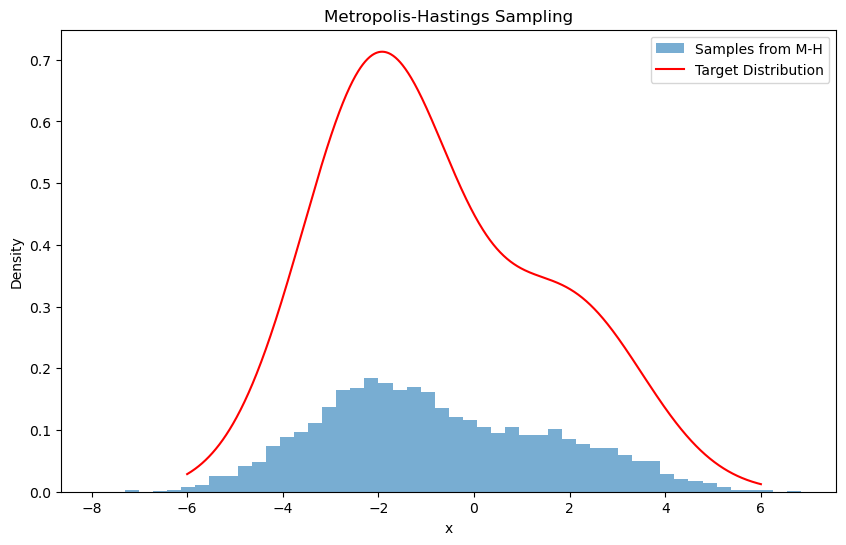

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution f (e.g., a Gaussian mixture)
def target_distribution(x):
    return 0.3 * np.exp(-0.2 * (x - 2)**2) + 0.7 * np.exp(-0.2 * (x + 2)**2)

# Define the proposal distribution q (e.g., a normal distribution centered at the current state)
def proposal_distribution(x, sigma=1.0):
    return np.random.normal(x, sigma)

# Metropolis-Hastings algorithm
def metropolis_hastings(target, proposal, num_samples, initial_state, proposal_sigma=1.0):
    samples = []
    current_state = initial_state
    
    for _ in range(num_samples):
        # Propose a new state
        proposed_state = proposal(current_state, proposal_sigma)
        
        # Calculate acceptance probability
        acceptance_probability = min(1, target(proposed_state) / target(current_state))
        
        # Accept or reject the proposed state
        if np.random.rand() < acceptance_probability:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return np.array(samples)

# Parameters
num_samples = 10000
initial_state = 0.0
proposal_sigma = 2.0

# Run the Metropolis-Hastings algorithm
samples = metropolis_hastings(target_distribution, proposal_distribution, num_samples, initial_state, proposal_sigma)

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Samples from M-H')
x_values = np.linspace(-6, 6, 1000)
plt.plot(x_values, target_distribution(x_values), 'r', label='Target Distribution')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [5]:
import random
import math

# Define the target distribution f (e.g., a Gaussian mixture)
def target_distribution(x):
    return 0.3 * math.exp(-0.2 * (x - 2)**2) + 0.7 * math.exp(-0.2 * (x + 2)**2)

# Define the proposal distribution q (e.g., a normal distribution centered at the current state)
def proposal_distribution(x, sigma=1.0):
    return x + random.gauss(0, sigma)

# Metropolis-Hastings algorithm
def metropolis_hastings(target, proposal, num_samples, initial_state, proposal_sigma=1.0):
    samples = []
    current_state = initial_state
    
    for _ in range(num_samples):
        # Propose a new state
        proposed_state = proposal(current_state, proposal_sigma)
        
        # Calculate acceptance probability
        acceptance_probability = min(1, target(proposed_state) / target(current_state))
        
        # Accept or reject the proposed state
        if random.random() < acceptance_probability:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return samples

# Simple ASCII plot function
def ascii_plot(samples, bin_count=20):
    min_val = min(samples)
    max_val = max(samples)
    bin_width = (max_val - min_val) / bin_count
    bins = [0] * bin_count
    
    for sample in samples:
        bin_index = int((sample - min_val) / bin_width)
        if bin_index >= bin_count:
            bin_index = bin_count - 1
        bins[bin_index] += 1
    
    max_bin = max(bins)
    for i in range(bin_count):
        bar = '#' * int(bins[i] / max_bin * 50)
        print(f"{min_val + i * bin_width:.2f} - {min_val + (i + 1) * bin_width:.2f}: {bar}")

# Parameters
num_samples = 10000
initial_state = 0.0
proposal_sigma = 2.0

# Run the Metropolis-Hastings algorithm
samples = metropolis_hastings(target_distribution, proposal_distribution, num_samples, initial_state, proposal_sigma)

# Plot the results using ASCII
ascii_plot(samples)

-7.12 - -6.39: 
-6.39 - -5.65: ##
-5.65 - -4.92: ######
-4.92 - -4.19: ############
-4.19 - -3.46: #########################
-3.46 - -2.72: #######################################
-2.72 - -1.99: ##########################################
-1.99 - -1.26: ##################################################
-1.26 - -0.52: ###########################################
-0.52 - 0.21: ##################################
0.21 - 0.94: ###########################
0.94 - 1.68: ###########################
1.68 - 2.41: ########################
2.41 - 3.14: ####################
3.14 - 3.87: ################
3.87 - 4.61: #########
4.61 - 5.34: ###
5.34 - 6.07: ##
6.07 - 6.81: 
6.81 - 7.54: 


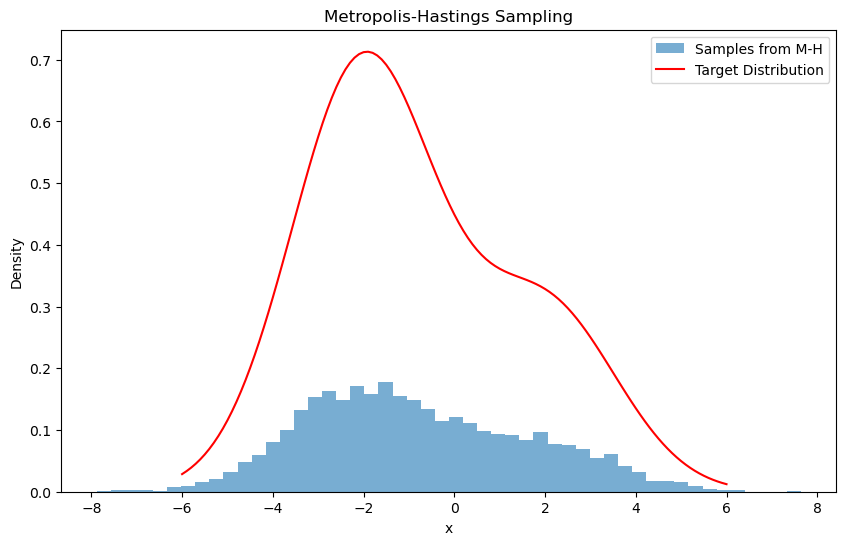

In [6]:
import random
import math
import matplotlib.pyplot as plt

# Define the target distribution f (e.g., a Gaussian mixture)
def target_distribution(x):
    return 0.3 * math.exp(-0.2 * (x - 2)**2) + 0.7 * math.exp(-0.2 * (x + 2)**2)

# Define the proposal distribution q (e.g., a normal distribution centered at the current state)
def proposal_distribution(x, sigma=1.0):
    return x + random.gauss(0, sigma)

# Metropolis-Hastings algorithm
def metropolis_hastings(target, proposal, num_samples, initial_state, proposal_sigma=1.0):
    samples = []
    current_state = initial_state
    
    for _ in range(num_samples):
        # Propose a new state
        proposed_state = proposal(current_state, proposal_sigma)
        
        # Calculate acceptance probability
        acceptance_probability = min(1, target(proposed_state) / target(current_state))
        
        # Accept or reject the proposed state
        if random.random() < acceptance_probability:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return samples

# Parameters
num_samples = 10000
initial_state = 0.0
proposal_sigma = 2.0

# Run the Metropolis-Hastings algorithm
samples = metropolis_hastings(target_distribution, proposal_distribution, num_samples, initial_state, proposal_sigma)

# Plot the results using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Samples from M-H')
x_values = [x * 0.1 for x in range(-60, 61)]
y_values = [target_distribution(x) for x in x_values]
plt.plot(x_values, y_values, 'r', label='Target Distribution')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

Here's the content formatted in Markdown/Jupyter notebook style with LaTeX math:

The distribution $q$ is called the instrumental (or proposal) distribution and the probability $\rho(x,y)$ the Metropolis-Hastings acceptance probability.

This algorithm always accepts values $y_t$ such that the ratio $f(y_t)/f(x)q(x|y^{(t)})$ is increased, compared with the previous value $f(x^{(t)})/f(x^{(t-1)})$. It follows in the symmetric case that the acceptance is driven by the objective ratio $f(y_t)/f(x^{(t)})$. An important feature of the algorithm [4.24] is that it may accept values $y_t$ such that the ratio is decreased, similar to stochastic optimization methods (see Section 5.4). Like the Accept-Reject method, the Metropolis-Hastings algorithm depends only on the ratios:

$$\frac{f(y)}{f(x^{(t)})} \quad \text{and} \quad \frac{q(x^{(t)}|y)}{q(y|x^{(t)})}$$

and is, therefore, independent of normalizing constants, meaning, again, that $q(x|z)$ is known up to a constant that is independent of $z^1$.

Obviously, the probability $\rho(x^{(t)}, y)$ is defined only when both $f(x^{(t)}) > 0$ and $q(x^{(t)}|y) > 0$. However, if the chain starts with a value $x^{(t)}$ such that $f(x^{(t)}) = 0$, it follows that $f(x^{(t')}) = 0$ for every later time value of $t'$ since $f(y) = 0$ should prevent acceptance of $y$. This means that the support of the chain should be restricted by the convention that the ratio $\rho(x,y)$ is equal to 0 when both $f(x)$ and $f(y)$ are null, in order to avoid theoretical difficulties.

There are similarities between [4.24] and the Accept-Reject methods of Section 2.3, and it is possible to use the algorithm [4.24] as an alternative to an Accept-Reject algorithm for a given pair $(f,g)$. These approaches are compared in Section 7.4. However, a sample produced by [4.24] differs from an iid sample. For one thing, such a sample may involve repeated occurrences of the same value, since rejection of $Y_t$ leads to repetition of $X^{(t)}$ at time $t + 1$ (an impossible occurrence in absolutely continuous iid settings). Thus, in calculations, a mean such as (7.1), the $Y$'s generated by the algorithm [4.24] can be associated with weights of the form $m_i/T$ $(m_i = 0,1,\ldots)$, where $m_i$ counts the number of times the subsequent values have been rejected. (This weighting scheme amounts to repeating these values, which will be discussed in Section 7.6 and Chapter 14.)

While [4.24] is a generic algorithm, defined for all $f$ and $q$, it is nonetheless necessary to impose minimal regularity conditions on both $f$ and the conditional distribution $q$ for $f$ to be the limiting distribution of the chain $(X^{(t)})$ produced by [4.24]. For instance, it is easier if $\mathcal{C}$ the support of $f$, is connected: an uncorrected support $\mathcal{C}$ can invalidate the Metropolis-Hastings algorithm. For such supports, it is necessary to proceed on one connected component at a time. (The same difficulty with the different connected components of $\mathcal{C}$ extends to the target of [4.24]). If the support of $f$ is transmitted by $q$, that is, if there exists $\mathcal{A} \subset \mathcal{E}$ such that:

$$\int_{\mathcal{A}} f(x)dx > 0 \quad \text{and} \quad \int_{\mathcal{A}} q(y|x)dy = 0, \quad \forall x \in \mathcal{E}$$

If we insist on this independence from $x$, it is because forgetting a term in $q(x|z)$ that depends on $x$ does jeopardize the validity of the whole algorithm.

In [7]:
import random
import math

def metropolis_hastings(f, q, q_sample, initial_state, n_iterations):
    """
    Simple Metropolis-Hastings algorithm implementation.
    
    Parameters:
    f(x) - target distribution (unnormalized)
    q(x|y) - proposal distribution density
    q_sample(x) - function to sample from proposal distribution
    initial_state - starting point
    n_iterations - number of iterations to run
    
    Returns:
    List of samples from target distribution
    """
    current_state = initial_state
    samples = []
    
    for _ in range(n_iterations):
        # Generate proposal
        proposed = q_sample(current_state)
        
        # Calculate acceptance ratio
        if f(current_state) == 0:
            acceptance_ratio = 0
        else:
            # Compute ratio of target distributions
            target_ratio = f(proposed) / f(current_state)
            # Compute ratio of proposal distributions
            proposal_ratio = q(current_state, proposed) / q(proposed, current_state)
            acceptance_ratio = target_ratio * proposal_ratio
        
        # Accept or reject step
        if random.random() < min(1.0, acceptance_ratio):
            current_state = proposed
            
        samples.append(current_state)
    
    return samples

# Example: Sampling from Normal Distribution
def example_normal_sampling():
    # Target: Standard Normal Distribution (unnormalized)
    def target(x):
        return math.exp(-0.5 * x * x)
    
    # Proposal: Random walk with fixed step size
    step_size = 1.0
    def proposal(x, y):
        # Symmetric proposal (q(x|y) = q(y|x))
        return 1.0  # Ratio will be 1 for symmetric proposal
    
    def proposal_sample(x):
        return x + random.uniform(-step_size, step_size)
    
    # Run sampler
    samples = metropolis_hastings(
        f=target,
        q=proposal,
        q_sample=proposal_sample,
        initial_state=0.0,
        n_iterations=10000
    )
    
    # Calculate mean and variance (after burn-in)
    burn_in = 1000
    samples = samples[burn_in:]
    mean = sum(samples) / len(samples)
    var = sum((x - mean) ** 2 for x in samples) / len(samples)
    
    return samples, mean, var

# Example usage
if __name__ == "__main__":
    samples, mean, var = example_normal_sampling()
    print(f"Sample Mean: {mean:.4f}")
    print(f"Sample Variance: {var:.4f}")
    print(f"Number of samples: {len(samples)}")
    
    # Print first few samples
    print("\nFirst 10 samples:")
    print(samples[:10])

Sample Mean: 0.0538
Sample Variance: 1.0363
Number of samples: 9000

First 10 samples:
[1.0480489162645468, 1.0480489162645468, 1.0480489162645468, 0.6025903776271211, 0.6958258844164893, 1.3608360592308415, 1.5826583962871763, 1.5826583962871763, 2.007814385601927, 1.8494375500667997]


## Metropolis-Hastings Algorithm and Stationary Distribution

The algorithm [4.24] does not have $ f $ as a limiting distribution since, for $ x^{(0)} \notin A $, the chain $ (X^{(i)}) $ never visits $ A $. Thus, a minimal necessary condition is that

$$
\bigcup_{x \in {\rm supp}\,f} {\rm supp}\,\vartheta(|x|) \supset {\rm supp}\,f.
$$

To see that $ f $ is the stationary distribution of the Metropolis chain, we first examine the Metropolis kernel more closely and find that it satisfies the detailed balance property (6.22). (See Problem 7.3 for details of the proof.)

## Theorem .2

Let $ (X^{(i)}) $ be the chain produced by [4.24]. For every conditional distribution $ q $ whose support includes $ \mathcal{E} $,

(a) the kernel of the chain satisfies the detailed balance condition with $ f $;

(b) $ f $ is a stationary distribution of the chain.

**Proof:**

The transition kernel associated with [4.24] is

$$
K(x, y) = \rho(x, y) q(y | x) + (1 - r(x)) \delta_{x}(y),
$$

where $ r(x) = \int \rho(x, y) q(y | x) dy $ and $ \delta_{x} $ denotes the Dirac mass in $ x $. It is straightforward to verify that

$$
\rho(x, y) q(y | x) f(x) = \rho(y, x) q(x | y) f(y),
$$

$$
(1 - r(x)) \delta_{x}(y) f(x) = (1 - r(y)) \delta_{y}(x) f(y),
$$

which together establish detailed balance for the Metropolis-Hastings chain. Part (b) now follows from Theorem 6.46.

The stationarity of $ f $ is therefore established for almost any conditional distribution $ q $, a fact which indicates the universality of Metropolis-Hastings algorithms.

## Convergence Properties

To show that the Markov chain of [4.24] indeed converges to the stationary distribution and that (7.1) is a convergent approximation to $ \mathfrak{I} $, we need to apply further the theory developed in Chapter 6.

Since the Metropolis-Hastings Markov chain has, by construction, an invariant probability distribution $ f $, if it is also an aperiodic Harris chain (see Definition 6.32), then the ergodic theorem (Theorem 6.63) does apply to establish a result like the convergence of (7.1) to $ \mathfrak{I} $.

A sufficient condition for the Metropolis-Hastings Markov chain to be *aperiodic* is that the algorithm [4.24] allows events such as $ \{X^{(i+1)} = X^{(i)}\} $; that is, that the probability of such events is not zero, and thus

$$
P\left[f(X^{(t)}) q(Y_{i} | X^{(t)}) \leq f(Y_{i}) q(X^{(t)} | Y_{i})\right] < 1.
$$

Interestingly, this condition implies that $ q $ is not the transition kernel of a reversible Markov chain with stationary distribution $ f $. (Note that $ q $ is not the transition kernel of the Metropolis-Hastings chain, given by (7.2), which *is* reversible.)

The property of *irreducibility* of the Metropolis-Hastings chain $ (X^{(t)}) $ follows from sufficient conditions such as positivity of the conditional density $ q $; that is,

$$
q(y | x) > 0 \text{ for every } (x, y) \in \mathcal{E} \times \mathcal{E},
$$

since it then follows that every set of $ \mathcal{E} $ with positive Lebesgue measure can be reached in a single step. As the density $ f $ is the invariant measure for the chain, the chain is *positive* (see Definition 6.38) and Proposition 6.36 implies that the chain is recurrent. We can also establish the following stronger result for the Metropolis-Hastings chain.

## Lemma .3

If the Metropolis-Hastings chain $ (X^{(t)}) $ is $ f $-irreducible, it is Harris recurrent.

**Proof:**

This result can be established by using the fact that a characteristic of Harris recurrence is that the only bounded harmonic functions are constant (see Proposition 6.61).

If $ h $ is a harmonic function, it satisfies

$$
h(x_{0}) = \mathbb{E}[h(X^{(1)}) | x_{0}] = \mathbb{E}[h(X^{(t)}) | x_{0}].
$$

Because the Metropolis-Hastings chain is positive recurrent and aperiodic, we can use Theorem 6.80, as in the discussion surrounding (6.27), and conclude that $ h $ is $ f $-almost everywhere constant and equal to $ \mathbb{E}_{f}[h(X)] $. To show that $ h $ is everywhere constant, write

$$
\mathbb{E}[h(X^{(1)}) | x_{0}] = \int \rho(x_{0}, x_{1}) q(x_{1} | x_{0}) h(x_{1}) dx_{1} + (1 - r(x_{0})) h(x_{0}),
$$

and substitute $ \mathbb{E}h(X) $ for $ h(x_{1}) $ in the integral above. It follows that

$$
\mathbb{E}_{f}[h(X)] r(x_{0}) + (1 - r(x_{0})) h(x_{0}) = h(x_{0});
$$

that is, $ (h(x_{0}) - \mathbb{E}[h(X)]) r(x_{0}) = 0 $ for every $ x_{0} \in \mathcal{E} $. Since $ r(x_{0}) > 0 $ for every $ x_{0} \in \mathcal{E} $, by virtue of the $ f $-irreducibility, $ h $ is necessarily constant and the chain is Harris recurrent.